In [76]:
import pandas as pd
import seaborn as sns
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
df_2 = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/Trabajo_practico/dengue_features_train.csv")
df_3 = pd.read_csv("/content/drive/MyDrive/Organizacion De Datos/Trabajo_practico/dengue_labels_train.csv")
nuevo_df = pd.merge(df_2, df_3, how= "inner")

In [78]:
nuevo_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [79]:
nuevo_df.corr()["total_cases"].nlargest(8)

<ipython-input-79-72cfa65233cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nuevo_df.corr()["total_cases"].nlargest(8)


total_cases                              1.000000
reanalysis_min_air_temp_k                0.325252
station_min_temp_c                       0.267109
reanalysis_air_temp_k                    0.264952
weekofyear                               0.216452
reanalysis_avg_temp_k                    0.151637
reanalysis_dew_point_temp_k              0.142531
reanalysis_specific_humidity_g_per_kg    0.129861
Name: total_cases, dtype: float64

In [80]:
nuevo_df = nuevo_df[nuevo_df["year"]>= 2004]

In [81]:
nuevo_df['reanalysis_air_temp_k'] = (nuevo_df['reanalysis_air_temp_k'] -273).round()
#nuevo_df['reanalysis_sat_precip_amt_mm'] = (nuevo_df['reanalysis_sat_precip_amt_mm']).round()

In [82]:
agrupado = nuevo_df.groupby(["year","reanalysis_air_temp_k"]).agg({"total_cases":["sum"]})

In [83]:
agrupado

total_cases
                                   sum
year reanalysis_air_temp_k            
2004 23.0                           45
     24.0                           85
     25.0                          456
     26.0                          277
     27.0                          170
     28.0                          196
2005 23.0                           41
     24.0                           96
     25.0                          192
     26.0                          162
     27.0                          144
     28.0                         1350
     29.0                          112
2006 23.0                           19
     24.0                          133
     25.0                          250
     26.0                          213
     27.0                           93
     28.0                          278
2007 23.0                           21
     24.0                          109
     25.0                          205
     26.0                          362
     27.0                          135
     28.0                         1502
2008 22.0                            0
     23.0                           66
     24.0                          149
     25.0                          475
     26.0                          183
     27.0                           34
2009 22.0                            3
     23.0                           11
     24.0                          196
     25.0                           61
     26.0                           35
     27.0                           17
2010 23.0                            1
     24.0                            8
     25.0                           83
     26.0                          112
     27.0                           19

In [84]:
agrupado = agrupado.reset_index() 

In [85]:
agrupado.columns=["year","reanalysis_air_temp_k","casos"]

In [86]:
matriz = agrupado.pivot_table(values = 'casos', index = "reanalysis_air_temp_k", columns="year").fillna(0)

In [87]:
matriz

year,2004,2005,2006,2007,2008,2009,2010
reanalysis_air_temp_k,,,,,,,
22.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
23.0,45.0,41.0,19.0,21.0,66.0,11.0,1.0
24.0,85.0,96.0,133.0,109.0,149.0,196.0,8.0
25.0,456.0,192.0,250.0,205.0,475.0,61.0,83.0
26.0,277.0,162.0,213.0,362.0,183.0,35.0,112.0
27.0,170.0,144.0,93.0,135.0,34.0,17.0,19.0
28.0,196.0,1350.0,278.0,1502.0,0.0,0.0,0.0
29.0,0.0,112.0,0.0,0.0,0.0,0.0,0.0


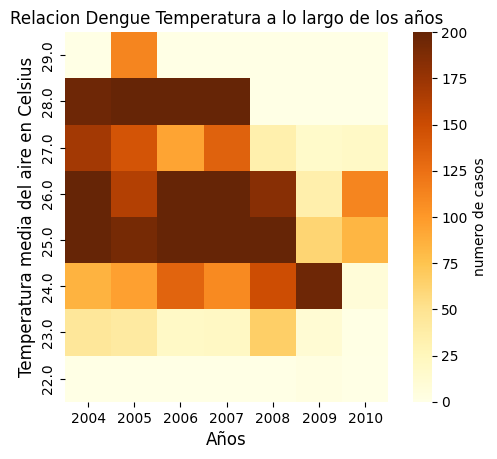

In [230]:
ax=sns.heatmap(matriz,square=True,vmax=200, cmap =sns.color_palette("YlOrBr", as_cmap=True),cbar_kws={'label': 'numero de casos'})
plt.title("Relacion Dengue Temperatura a lo largo de los años")
plt.xlabel('Años', fontsize = 12)
plt.ylabel('Temperatura media del aire en Celsius', fontsize = 12) 
ax.invert_yaxis()